<div align="right">Revision 1 : October 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/ME208583/y2022/hws/merobo22_hw4_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

First Semester, Academic Year 2022

<br>**01208583 Robotics**

### Homework 4 : discrete cascaded PID controllers implementation

(10 points) Simulate step response the cascaded PID feedback in Homework 3 and compare with the continuous-time result.
They should match well.

Type student name - surname and ID in the cell below.

In [ ]:
#Avg Poipet 6010506258

#### Homework problems may depend on the last 3 digits of your student ID

-------xyz (other digits are ignored)

In case any digit in the last 3 are 0, it must be replaced by 5.

#### Examples
    
Student A's ID - 6010555853 results in x = 8, y = 5, z = 3

Student B 's ID - 6010546104 results in x = 1, y = 5, z = 4

Student C 's ID - 6310055032 results in x = 5, y = 3, z = 2
    
These valuess are used for all the problems in the exam where x,y,and/or z appear. In this 
sense, the results from each student should be different even computed using the same methods.

Operations that may be applied to the variables.

$+$ addition

 $-$  subtraction

 $*$  multiplication 

 $/$ division

$**$ raise to the power (For example, x**z means $x^z$)

including math opertions such as $\exp(x)$, $\sin(z*t)$

If a variable is embedded in some digit of a value without any operation symbol, 
just replace that digit. 
<br>For example,  z=8 y = 3 $\Rightarrow$ 12z7 = 1287, 4.3y5 = 4.335

Conditional statement may be used, such as
if x<5 do task A, otherwise do task B

<em>Example: </em> Let $R1 = 1000*x \,\Omega, C1 = 10*y \,\mu F$

<ul>
<li />Student A (x=8, y=5) does this problem with R1 = 8000 $\Omega$, C1 = 50 $\mu$F
<li />Student B (x=1, y=5) does this problem with R1 = 1000 $\Omega$, C1 = 50 $\mu$F
<li />Student C (x=5, y=3) does this problem with R1 = 5000 $\Omega$, C1 = 30 $\mu$F
</ul>


In [ ]:
# You need to install these libraries in the Colab environment
#!pip install control

In [2]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### (from previous homeworks)

One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

<code>
	km = (y+z)*100  # torque constant
	kb = 1  # back EMF constant
	k = 1000 # torsional stiffness of harmonic drive
	r = x   # gear ratio
	R = 1  # armature resistance
	L = 0.1 # armature inductance
	Jm = (x+y)  #  motor inertia
	Bm = 0.01*y  # motor shaft friction
	Jl = (x+z)  # load inertia
	Bl = 0.01*z  # load friction
</code>

Write code to create a plant transfer function of HDM as in (3) 

#### Copy your solution from HW2


In [3]:
#Change student ID variables to match your ID.
id_x = 2
id_y = 5
id_z = 8

In [4]:
km = (id_y+id_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (id_x+id_y)  #  motor inertia
Bm = 0.01*id_y  # motor shaft friction
Jl = (id_x+id_z)  # load inertia
Bl = 0.01*id_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

#### Result from homework 4

Figure 3 shows cascaded PID structure (for a robot joint driven by simple 
DC motor) to improve closed-loop performance.  

<p align="center">
<img src="https://drive.google.com/uc?id=1uUQjWyLEXP1XmwUTk5KpU6Tcr84k61G7" width=550 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 3 cascaded PID control</b></div>

Extract the integrator from the HDM plant in HW2 (in above cell) to use it in the outer loop 
as shown in Figure 3. The rest of the plant transfer function is in the inner-loop. For both 
loops, use the following PID equation 

$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{N/s+1}
$$

***

**P1** (10 points)

Implement the discrete cascaded PID controllers from HW4. Some of the code such as plant simulation is 
provided for you. Just fill in the missing code.

#### Solution

Create a PID function to be used in simulation.

In [5]:
def PID(kp, ki,kd,N):
    s = ctl.tf("s")
    C = kp + ki/s + kd*s*N/(s+N)
    return C

Consider the HDM plant from P1. Factorize it as 
$$
P(s) = P_{inner}(s)\frac{1}{s}
$$
So can find $P_{inner}(s)$ from
$$
P_{inner}(s) = sP(s)
$$

In [6]:
P_inner = ctl.minreal(s*P)
P_inner

1 states have been removed from the model


TransferFunction(array([185714.28571429]), array([1.00000000e+00, 1.00151429e+01, 3.95729434e+03, 2.46014343e+03,
       3.71447143e+05]))

Construct cascaded PID to simulate the response. Use PID parameters achieved from Homework 4. 
(If you are 
unsuccessful with that homework, simply  use a set of parameters that yields closed-loop stability and decent 
step response.)

In [7]:
Kp1 = 2.3
Ki1 = 0.8
Kd1 = 0.6
N1 = 20
Kp2 = 1.6
Ki2 = 1.3
Kd2 = 0.1
N2 = 20

0 states have been removed from the model


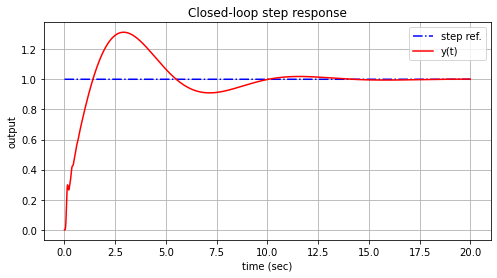

In [8]:
C_pid_inner = PID(Kp1,Ki1,Kd1,N1)
L_inner = C_pid_inner*P_inner
T_inner = ctl.feedback(L_inner)
C_pid_outer = PID(Kp2,Ki2,Kd2,N2)
P_outer = 1/s
L_outer = C_pid_outer*T_inner*P_outer
T_outer = ctl.minreal(ctl.feedback(L_outer))
tvec = np.arange(0,20,0.001)
tv, y = ctl.step_response(T_outer,tvec)
r = np.ones(tv.shape)
plt.figure(figsize=(8,4))
plt.plot(tv,r,'b-.',tv,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

Discretize the PIDs and plant, then form a loop for discrete-time simulation.

In [9]:
Ts = 0.001 # sampling period

In [10]:
# inner plant discretization
Pd_inner = ctl.sample_system(P_inner, Ts, method='tustin')
Pd_inner_num, Pd_inner_den = ctl.tfdata(Pd_inner)
pd_inner_num = np.squeeze(np.array(Pd_inner_num))
pd_inner_den = np.squeeze(np.array(Pd_inner_den))
pd_inner_num_order = len(pd_inner_num)
pd_inner_den_order = len(pd_inner_den)
px_inner = np.zeros((pd_inner_den_order,1)) 

In [11]:
# inner PID discretization
Cd_inner = ctl.sample_system(C_pid_inner, Ts, method='tustin')
Cd_inner_num, Cd_inner_den = ctl.tfdata(Cd_inner)
cd_inner_num = np.squeeze(np.array(Cd_inner_num))
cd_inner_den = np.squeeze(np.array(Cd_inner_den))
cd_inner_num_order = len(cd_inner_num)
cd_inner_den_order = len(cd_inner_den)
cx_inner = np.zeros((cd_inner_den_order,1)) 

In [12]:
# outer plant discretization
Pd_outer = ctl.sample_system(P_outer, Ts, method='tustin')
Pd_outer_num, Pd_outer_den = ctl.tfdata(Pd_outer)
pd_outer_num = np.squeeze(np.array(Pd_outer_num))
pd_outer_den = np.squeeze(np.array(Pd_outer_den))
pd_outer_num_order = len(pd_outer_num)
pd_outer_den_order = len(pd_outer_den)
px_outer = np.zeros((pd_outer_den_order,1))  

In [13]:
# outer PID discretization
Cd_outer = ctl.sample_system(C_pid_outer, Ts, method='tustin')
Cd_outer_num, Cd_outer_den = ctl.tfdata(Cd_outer)
cd_outer_num = np.squeeze(np.array(Cd_outer_num))
cd_outer_den = np.squeeze(np.array(Cd_outer_den))
cd_outer_num_order = len(cd_outer_num)
cd_outer_den_order = len(cd_outer_den)
cx_outer = np.zeros((cd_outer_den_order,1)) 

In [14]:
tvec = np.arange(0,20,0.001)
tv, yc = ctl.step_response(T_outer,tvec) # used for comparison
rvec = np.ones(tvec.shape)
yvec = np.zeros(tvec.shape)

In [15]:
i=0
e_outer = 0
co_outer = 0
e_inner = 0
co_inner = 0
po_inner = 0
po_outer = 0
for i in range(len(tvec)):

    # inner plant state updates
    for k in range(pd_inner_den_order-1):
        px_inner[pd_inner_den_order-k-1] = px_inner[pd_inner_den_order-k-2]
        
    # outer plant state updates
    for k in range(pd_outer_den_order-1):
        px_outer[pd_outer_den_order-k-1] = px_outer[pd_outer_den_order-k-2]

    # inner controller state updates
    for k in range(cd_inner_den_order-1):
        cx_inner[cd_inner_den_order-k-1] = cx_inner[cd_inner_den_order-k-2]

    # outer controller  state updates
    for k in range(cd_outer_den_order-1):
        cx_outer[cd_outer_den_order-k-1] = cx_outer[cd_outer_den_order-k-2]
        
        
    e_outer = rvec[i] - po_outer
    cx_outer[0] = e_outer 
    # outer PID difference equation
    co_outer = cd_outer_num[0]*e_outer
    for k in range(cd_outer_den_order-1):
        cx_outer[0] = cx_outer[0] - cd_outer_den[k+1]*cx_outer[k+1]
        co_outer = co_outer + (cd_outer_num[k+1] - cd_outer_num[0]*cd_outer_den[k+1])*cx_outer[k+1]
    
    # compute error for inner loop
    e_inner = co_outer - po_inner
    cx_inner[0] = e_inner
    # inner PID difference equation
    co_inner = cd_inner_num[0]*e_inner
    for k in range(cd_inner_den_order-1):
        cx_inner[0] = cx_inner[0] - cd_inner_den[k+1]*cx_inner[k+1]
        co_inner = co_inner + (cd_inner_num[k+1] - cd_inner_num[0]*cd_inner_den[k+1])*cx_inner[k+1]
    
    # inner plant difference equation
    px_inner[0] = co_inner
    po_inner = pd_inner_num[0]*co_inner
    for k in range(pd_inner_den_order-1):
        px_inner[0] = px_inner[0] - pd_inner_den[k+1]*px_inner[k+1]
        po_inner = po_inner + (pd_inner_num[k+1] - pd_inner_num[0]*pd_inner_den[k+1])*px_inner[k+1]

    # outer plant difference equation
    px_outer[0] = po_inner
    po_outer = pd_outer_num[0]*po_inner
    for k in range(pd_outer_den_order-1):
        px_outer[0] = px_outer[0] - pd_outer_den[k+1]*px_outer[k+1]
        po_outer = po_outer + (pd_outer_num[k+1] - pd_outer_num[0]*pd_outer_den[k+1])*px_outer[k+1]
    
    
    yvec[i] = po_outer
    


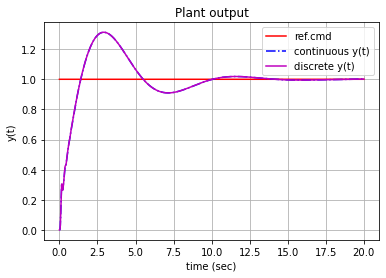

In [16]:
# plot the result

plt.figure()
plt.plot(tvec,rvec,'r-',tv, yc,'b-.',tvec,yvec,'m-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(['ref.cmd','continuous y(t)','discrete y(t)'])

plt.title("Plant output")

plt.show()

Actually, the simulation is somewhat easier to manage if you use 
structured programming as explained in this link.

https://github.com/dewdotninja/control_python/blob/main/discrete_implement.ipynb
    
Write the discretization/implementation steps as
functions.

In [17]:
# usage : num_coef,den_coef,state_vec = discretize(transfer_fn,sampling_period)
def discretize(P,Ts):
    Pd = ctl.sample_system(P, Ts, method='tustin')
    Pdnum, Pdden = ctl.tfdata(Pd)
    pdnum = np.squeeze(np.array(Pdnum))
    pdden = np.squeeze(np.array(Pdden))
    px_size = len(pdden)    
    px = np.zeros((px_size,1))
    return pdnum, pdden, px

In [18]:
# Usage : state_vec = state_update(state_vec)
def state_update(px):
    px_size = len(px)
    for k in range(px_size-1): 
        px[px_size -k-1] = px[px_size-k-2]
    return px

In [19]:
# Usage : output,px = df2_compute(input,num_coef,den_coef,state_Vec)
def df2_compute(u,pdnum,pdden,px):
    px_size = len(px)
    px[0] = u 
    y = pdnum[0]*u
    for k in range(px_size-1):
        px[0] = px[0] -pdden[k+1]*px[k+1]
        y = y + (pdnum[k+1] - pdnum[0]*pdden[k+1])*px[k+1]   
    return y,px

In [20]:
# Usage : state_vec = state_reset(state_vec)
def state_reset(px):
    px_size = len(px)
    for k in range(px_size): 
        px[k] = 0.0
    return px

Then the above simulation loop can be written as 

In [21]:
pnum_inner,pden_inner,px_inner = discretize(P_inner, Ts)
pnum_outer,pden_outer,px_outer = discretize(P_outer, Ts)
cnum_inner,cden_inner,cx_inner = discretize(C_pid_inner, Ts)
cnum_outer,cden_outer,cx_outer = discretize(C_pid_outer, Ts)

In [22]:
i=0
e_outer = 0
co_outer = 0
e_inner = 0
co_inner = 0
po_inner = 0
po_outer = 0
px_inner = state_reset(px_inner)
px_outer = state_reset(px_outer)
cx_inner = state_reset(cx_inner)
cx_outer = state_reset(cx_outer)

for i in range(len(tvec)):

    # state updates
    px_inner = state_update(px_inner)
    px_outer = state_update(px_outer)
    cx_inner = state_update(cx_inner)
    cx_outer = state_update(cx_outer)
    
    e_outer = rvec[i] - po_outer
    cx_outer[0] = e_outer 
    # outer PID difference equation
    co_outer,cx_outer = df2_compute(e_outer,cnum_outer,cden_outer,cx_outer)
#     co_outer = cd_outer_num[0]*e_outer
#     for k in range(cd_outer_den_order-1):
#         cx_outer[0] = cx_outer[0] - cd_outer_den[k+1]*cx_outer[k+1]
#         co_outer = co_outer + (cd_outer_num[k+1] - cd_outer_num[0]*cd_outer_den[k+1])*cx_outer[k+1]
    
    # compute error for inner loop
    e_inner = co_outer - po_inner
    co_inner,cx_inner = df2_compute(e_inner,cnum_inner,cden_inner,cx_inner)    
#     cx_inner[0] = e_inner
#     # inner PID difference equation
#     co_inner = cd_inner_num[0]*e_inner
#     for k in range(cd_inner_den_order-1):
#         cx_inner[0] = cx_inner[0] - cd_inner_den[k+1]*cx_inner[k+1]
#         co_inner = co_inner + (cd_inner_num[k+1] - cd_inner_num[0]*cd_inner_den[k+1])*cx_inner[k+1]
    
    # inner plant difference equation
    po_inner,px_inner = df2_compute(co_inner,pnum_inner,pden_inner,px_inner)    
    
    
#     px_inner[0] = co_inner
#     po_inner = pd_inner_num[0]*co_inner
#     for k in range(pd_inner_den_order-1):
#         px_inner[0] = px_inner[0] - pd_inner_den[k+1]*px_inner[k+1]
#         po_inner = po_inner + (pd_inner_num[k+1] - pd_inner_num[0]*pd_inner_den[k+1])*px_inner[k+1]

    # outer plant difference equation
    po_outer,px_outer = df2_compute(po_inner,pnum_outer,pden_outer,px_outer)
    
#     px_outer[0] = po_inner
#     po_outer = pd_outer_num[0]*po_inner
#     for k in range(pd_outer_den_order-1):
#         px_outer[0] = px_outer[0] - pd_outer_den[k+1]*px_outer[k+1]
#         po_outer = po_outer + (pd_outer_num[k+1] - pd_outer_num[0]*pd_outer_den[k+1])*px_outer[k+1]
    
    
    yvec[i] = po_outer
    


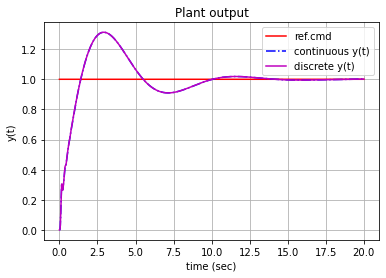

In [23]:
# plot the result

plt.figure()
plt.plot(tvec,rvec,'r-',tv, yc,'b-.',tvec,yvec,'m-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(['ref.cmd','continuous y(t)','discrete y(t)'])

plt.title("Plant output")

plt.show()